<center><h1>Függvények, illesztés, analitikai műveletek</center></h1>

Ebben a notebookban bemutatjuk, hogy lehet függvényeket írni, miként lehet az adatpontokra elvégezni az illesztési feladatokat.

In [1]:
%pylab inline
figsize(6,6) #Képméret megváltoztatása

Populating the interactive namespace from numpy and matplotlib


## Függvények (function)

A számítógép-programozásban a függvény (function) egy nagyobb program forráskódjának egy viszonylag jól felismerhető része, amely egy adott feladatot hajt végre. A kód többi részétől viszonylag független egység, és többször felhasználható anélkül, hogy a program kódjának több példányban is tartalmaznia kellene, azaz többször, több helyen is hivatkozhatunk ugyanarra a függvényre. Hasonló fogalmat jelölnek a eljárás, szubrutin, metódus, procedúra vagy alprogram nevek is.

A függvények és eljárások használatnak előnyei

- csökkenthető a kódismétlődés
- ugyanaz a függvény más programban is használható
- összetett problémák egyszerűbb részekre bonthatók, ami könnyebbé teszi a kód frissítését és bővítését
- javítható a program olvashatósága
- elrejthetők és szabályozhatók a program egyes részei

Az eddig megismert parancsokat felfoghatjuk már előre definiált függvényként. Például a `exp` parancs, olyan függvény, ami kiszámolja az `e` hatványait. Vagy a `plot` egy olyan eljárás, ami ábrázolja az adatokat. Néhány programozási nyelvben szokás különbséget tenni eljárás és függvény között. A függvény egy csoportja az eljárások halmazának. Olyan speciális eljárások, melyeknek van valamilyen visszatérési értéke (csinál valami, és az eredményt visszaadja a programnak). Tehát a `plot` inkább csak szimpla eljárás, míg az `exp`, vagy `sqrt` igazi függvények. A C-ben és a pythonban a két fogalmat szinonimaként használhatjuk. 

A következőkben bemutatjuk, hogyan lehet egyszerűen a függvények használni. 

A függvények szintaktikájára jellemző, hogy 3 fő része van.
* Beolvasott adatok, paraméterek
* Műveletvégzés
* A kész eredmény visszaadása a fő programnak (oda ahol megvolt hívva a függvény): **`return`** rész

A következő példában a `func` függvény kiszámolja a beadott szám reciprokát, majd az eredményt visszaadja meghívás helyének, ez esetben a plot parancs y adatsorának.

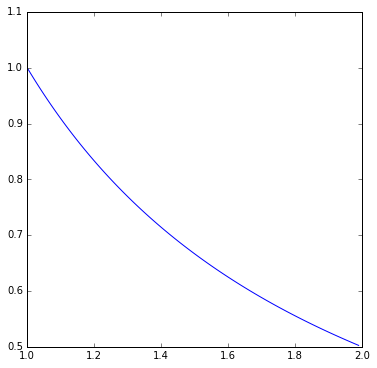

In [2]:
############################

def func(x): # A fügvényünk megkapja az "x" adatokat
    return 1/x # A visszadás és a művelevégézés ez esetben egybe van olvasztva

############################


x=arange(1,2,0.01)  # Geneáljuk az x adatokat

plot(x, func(x))  # Ábároljuk az "x" fügvényében, a "func(x)" számokat

Lehet több függvényünk is: (f1 és f2 nevű)

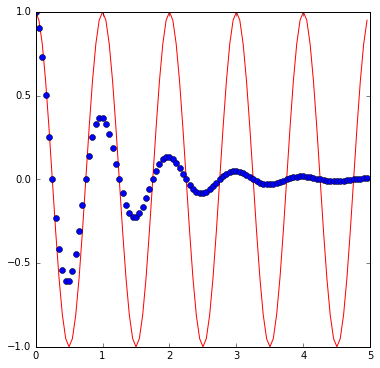

In [3]:
########################################################
def f1(t):  # Egy "sima" koszinusz függvény
    y=cos(2*pi*t)
    return y
########################################################
########################################################
def f2(t):
    y=f1(t) * exp(-t) # Adjunk hozzá "exp(-t)" csillapítást
    return y
########################################################

t1 = arange(0.0, 5.0, 0.05)

plot(t1, f1(t1), 'r')
plot(t1, f2(t1), 'bo')



Egy másik példa függvények használatára: 
Figyeljük meg, hogy a függvény hívásakor több paramétert is meg kell adni! (x,a,b-t is, ahol `x` egy vektor, míg `a` és `b` konstansok). A konstansok átadása a következő módon történik:<br>
>`func(x, *(a,b))`

(2.5, 100)


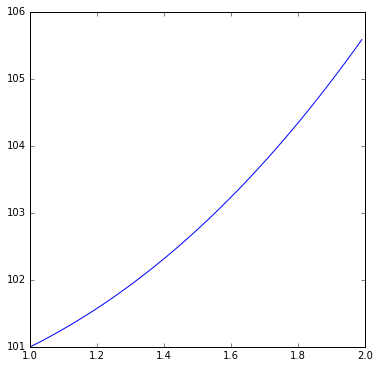

In [6]:
def func(x,a,b):
    return (x**a)+b

x=arange(1,2,0.01)
zz=(2.5,100)
print(zz)

plot(x, func(x, *(zz)))

### Összetettebb feladat

A következő példában a "Mandelbrot-halmaz" kiszámolás és ábrázolása a feladat. A Mandelbrot-halmaz (fraktál) egy síkbeli alakzat, amelyet egy alapvetően nagyon egyszerű algebrai összefüggés bonyolultabb (végtelennel kapcsolatos, analitikus fogalmakat, határérték-számítást igénylő) elemzése ad meg, rajzol ki.

A matematikában a Mandelbrot-halmaz azon c komplex számokból áll (a „komplex számsík” azon pontjainak mértani helye, halmaza), melyekre az alábbi (komplex szám értékű) $x_{n}$ rekurzív sorozat:
$$ x_1 := c$$
$$ x_{n+1} := (x_n)^2+c$$
nem tart végtelenbe, azaz abszolút értékben (hosszára nézve) korlátos.
<br><br><br>
Ábrázolva:
<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/Mandelset_hires.png" width=300>

<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; *** Elemezzük ki közösen a kódot!***

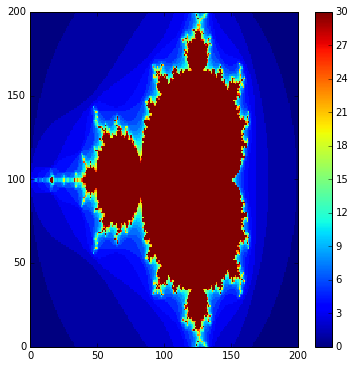

In [7]:
########################################################

def mandelbrot( h,w, maxit=30 ): # A "maxit" default értéke szerepel itt
    """Visszatér egy (h,w) méretű Mandelbrot fraktál képével"""
    y,x = ogrid[ -1.0:1.0:h*1j, -2:1:w*1j ] #létrehoz egy (h,w) méretű mátrixot komplex elemekkel
    c = x+y*1j
    z = c            # Első eleme a sorozatnak (Complex szám!)
    divtime = maxit + zeros(z.shape, dtype=int)  #létrehoz egy csupa "maxit" értékű mátrixot
    for i in range(maxit):
        z = z**2 + c         # A többi elem így számolódik (rekurzív sorozat)
        diverge = z*conj(z) > 2**2         # kik divergensek
        div_now = diverge & (divtime==maxit)  # ki csak most divergens 
        divtime[div_now] = i                  # a most divergens tag beírása
        z[diverge] = 2                        # a túl nagy divergencia elkerülése

    return divtime

########################################################

pcolor(mandelbrot(200,200))   # Itt adjuk meg mekkora tömböt dolgozzon fel a függvény
colorbar()

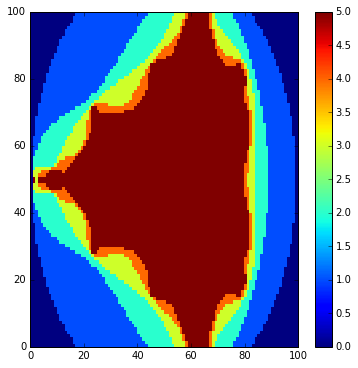

In [8]:
pcolor(mandelbrot(100,100, maxit=5))   # Megadható, hogy mennyi legyen a "maxit"
colorbar()

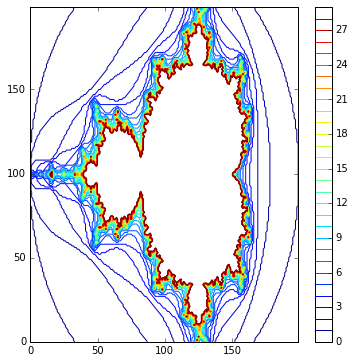

In [9]:
contour(mandelbrot(200,200), levels=arange(0,30,1))
colorbar()

# Függvény illesztés adatokra

Az adatainkra is ugyanolyan függvényt kell illeszteni, mint amit fentebb megismertünk. 
A függvények illesztéséhez a **`curve_fit`** eljárást használjuk, a **`scipy`** csomagból, mely a Gnuplot-hoz hasonló elven keresi meg a paraméterek ideális értékét.

In [10]:
adat=loadtxt("sinusadatok.dat")
x=adat[:,0]
y=adat[:,1]
z=adat[:,2]

In [11]:
from scipy.optimize import curve_fit
figsize(10,10)

def func(x, a,b,c,d):
    return a*cos((d*(x+c)))+b

parameter, covariance_matrix = curve_fit(func, x, z)

Az illesztett paraméterek:

In [12]:
print(parameter)

[-1.21224409  2.60067796  1.22001586  1.00095743]


A kovariancia mátrix diagonális elemei megegyeznek a hiba négyzetével, tehát az illesztési hiba így számolandó:

In [13]:
print(sqrt(diag(covariance_matrix)))

[ 0.00795894  0.00558654  0.01376697  0.0013635 ]


Kicsit "szofisztikáltabban" így lehet leríni:

In [14]:
print("Amplitúdó:",parameter[0], "+/-", sqrt(diag(covariance_matrix)[0]))
print("y eltolás:",parameter[1], "+/-", sqrt(diag(covariance_matrix)[1]))
print("Kezdőfázis:",parameter[2]/(pi)*180.+180., 
      "+/-", sqrt(diag(covariance_matrix)[2]/(pi)*180), "[fok]")
print("Fázisnyújtás:",parameter[3], "+/-", sqrt(diag(covariance_matrix)[3]))

Amplitúdó: -1.21224408966 +/- 0.00795893637343
y eltolás: 2.6006779641 +/- 0.00558654343834
Kezdőfázis: 249.901759916 +/- 0.104207686602 [fok]
Fázisnyújtás: 1.000957427 +/- 0.00136350325803


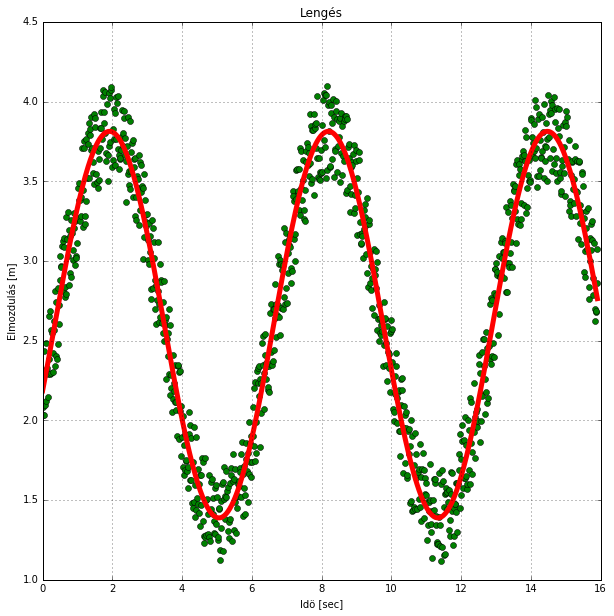

In [15]:
plot(x,z, "go")
xlabel("Idö [sec]")
ylabel("Elmozdulás [m]")
title("Lengés")
grid(True)
plot(x, func(x, *parameter), 'r-', label='fit',linewidth=5.0)

#### Illesztési paraméterek megadása

Lehetőség van kezdőfeltételt is megadni az illesztéshez. Erre a "p0" parameter szolgál. A mérési hibát a "sigma" paraméter után kell megadni.

In [16]:
error=std(z) # "std" a sztendered hibát adja meg
print(error)

0.856699230653


In [17]:
# Megadunk kezdőfeltétlet, és azt mondjuk, hogy az előbb számolt hiba a mérési hibánk.
param, cov = curve_fit(func, x, z, p0=(1.,3.,0,1), sigma=error)

### Most mit fogunk elrontani?

In [18]:
print("Amplitúdó:",param[0], "+/-", sqrt(diag(cov)[0]))
print("y eltolás:",param[1], "+/-", sqrt(diag(cov)[1]))
print("Kezdőfázis:",param[2]/(pi)*180.+180., "+/-", 
      sqrt(diag(cov)[2]/(pi)*180), "[fok]")
print("Fázisnyújtás:",param[3], "+/-", sqrt(diag(cov)[3]))

Amplitúdó: 1.21224408832 +/- 0.0079589311238
y eltolás: 2.60067796639 +/- 0.0055865426268
Kezdőfázis: 70.0739285247 +/- 0.0769798067432 [fok]
Fázisnyújtás: 1.00095742632 +/- 0.00136350612273


In [ ]:
print("Amplitúdó:",param[0], "+/-", sqrt(diag(cov)[0]))
print("y eltolás:",param[1], "+/-", sqrt(diag(cov)[1]))
print("Kezdőfázis:",param[2]/(pi)*180.+180., "+/-", 
      sqrt(diag(cov)[2]/(pi)*180), "[fok]")
print("Fázisnyújtás:",param[3], "+/-", sqrt(diag(cov)[3]))